# Gaia Data for OB150029

Search Gaia DR2 

In [20]:
import numpy as np
import pylab as plt
from astropy.io import fits
from astropy import table
from flystar import starlists, align
from flystar import transforms
from flystar import analysis, plots
from matplotlib.colors import LogNorm
import copy
from importlib import reload

target = 'ob150029'
ra = '17:59:46.60'
dec = '-28:38:41.8'


Define the coordinates for this object. We will search within 10" radius of the target.

In [21]:
search_rad = 10.0   # arcsec

gaia = analysis.query_gaia(ra, dec, search_radius=search_rad)

# Coordinates are arcsecs offset +x to the East.
targets_dict = {'ob150029':   [0.0, 0.0],
                'S11_15_3.9': [ 1.13982, 3.73524],
                'S13_13_4.5': [-4.42878, 0.03100]
               }

my_gaia = analysis.prepare_gaia_for_flystar(gaia, ra, dec, targets_dict=targets_dict)


Found match for:  ob150029
Found match for:  S11_15_3.9
Found match for:  S13_13_4.5


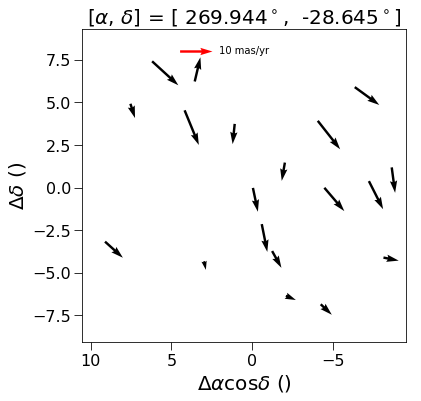

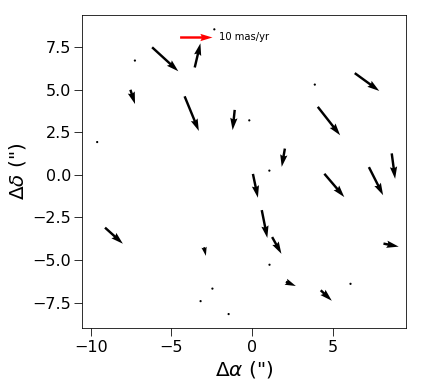

In [22]:
plots.plot_gaia(gaia)
plots.plot_pm(my_gaia)

In [23]:
gaia[0:10]['source_id','pmra','pmdec'].pprint(max_width=1000)
my_gaia[0:10]['source_id','vx','vy','name'].pprint(max_width=1000)

     source_id              pmra               pmdec       
------------------- ------------------- -------------------
4062575141204361856 -1.6123295507625997  -7.335898165122768
4062575141137611008                  --                  --
4062575136877849344 -1.8027427941448368  -8.569262819927035
4062575136877849984  1.0209671338318573  -5.635913809931664
4062575141204361984                  --                  --
4062575141204360192  -2.984091249458642  -5.112384710071518
4062575136877879296  0.6848936156065186  -6.239739142300629
4062575136877897472  -6.338948875708079  -7.038373988981698
4062575141204355456 -0.5819423703039869 -2.6648314071503005
4062575136877789568                  --                  --
     source_id                vx                     vy                   name       
------------------- ---------------------- ---------------------- -------------------
4062575141204361856  0.0016123295507625996  -0.007335898165122768            ob150029
4062575141137611008   

Plot the stars on top of our NIRC2 image. We need to do some coordinate conversions first.

In [24]:
# Image to plot
img_base = 'mag17jul19_ob150029_kp.fits'
img = fits.getdata(img_base)

# Get NIRC2 starlist
lis_file = img_base.replace('.fits', '_rms_named.lis')
lis_tab = starlists.StarList.from_lis_file(lis_file)

# Find the target and get its pixel coordinates in this image.
tdx = np.where(lis_tab['name'] == target)[0]
coo_targ = np.array([lis_tab['x'][tdx[0]], lis_tab['y'][tdx[0]]])
coo_targ -= 1   # Shift to a 0-based array system


(-5.2, 5.2)

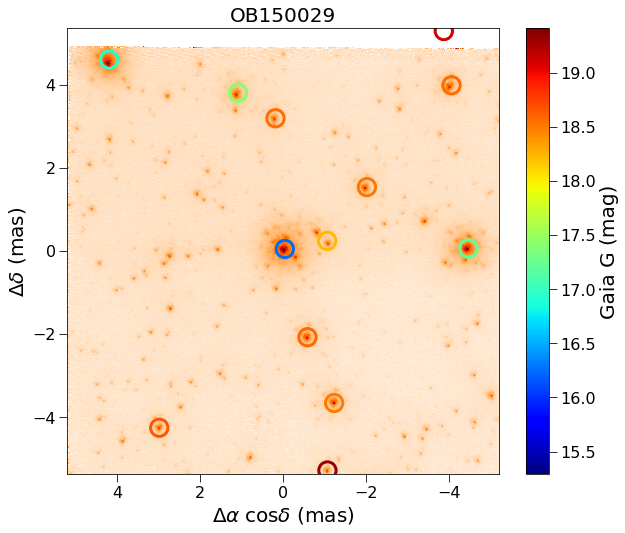

In [25]:
# Define the axes
scale = 0.00994
x_axis = np.arange(img.shape[0], dtype=float)
y_axis = np.arange(img.shape[1], dtype=float)
x_axis = (x_axis - (coo_targ[0] - 1)) * scale * -1.0
y_axis = (y_axis - (coo_targ[1] - 1)) * scale

vmin = 10
vmax = 1e5
norm = LogNorm(vmin, vmax)
size = 10**(-(my_gaia['m'] - 23) / 3.0)

idx = np.where(my_gaia['m'] < 20)[0]
plt.figure(figsize=(10,8))
plt.imshow(img, cmap='gist_heat_r', norm=norm, extent=[x_axis[0], x_axis[-1], y_axis[0], y_axis[-1]])
sc = plt.scatter(my_gaia['x0'][idx] * -1.0, my_gaia['y0'][idx], c=my_gaia['m'][idx], s=300, linewidth=3)
sc.set_facecolor('none')
plt.colorbar(label='Gaia G (mag)')
plt.xlabel(r'$\Delta \alpha \; \cos \delta$ (mas)')
plt.ylabel(r'$\Delta \delta$ (mas)')
plt.axis('equal')
plt.title(target.upper())

plt.xlim(5.2, -5.2)
plt.ylim(-5.2, 5.2)

In [26]:

# Gaia Catalog Prepped for Alignment
print('')
print('New Gaia Catalog')
prt_fmt = '{name:20s}  {mag:5.2f}  {ra:7.4f} +/- {ra_err:6.4f}  {dec:7.4f} +/- {dec_err:6.4f}'
prt_fmt += '  {pmra:8.4f} +/- {pmra_err:7.4f}  {pmdec:8.4f} +/- {pmdec_err:7.4f}'
prt_fmt += '{t0:8.3f}  {gname:20s}' 
for ii in range(10):
    print(prt_fmt.format(name=my_gaia['name'][ii], mag=my_gaia['m'][ii], 
                         ra=my_gaia['x0'][ii], ra_err=my_gaia['x0e'][ii], 
                         dec=my_gaia['y0'][ii], dec_err=my_gaia['y0e'][ii],
                         pmra=my_gaia['vx'][ii], pmra_err=my_gaia['vxe'][ii],
                         pmdec=my_gaia['vy'][ii], pmdec_err=my_gaia['vye'][ii],
                         t0=my_gaia['t0'][ii], gname=my_gaia['source_id'][ii]))


print(my_gaia.colnames)

mdx = np.argsort(lis_tab['m'])
print(lis_tab[mdx][0:10])



New Gaia Catalog
ob150029              16.24   0.0392 +/- 0.0002   0.0518 +/- 0.0002    0.0016 +/-  0.0005   -0.0073 +/-  0.00042015.500  4062575141204361856 
4062575141137611008   18.23   1.0567 +/- 0.0171   0.2455 +/- 0.0157    0.0000 +/-  0.0000    0.0000 +/-  0.00002015.500  4062575141137611008 
4062575136877849344   18.58   0.5855 +/- 0.0003  -2.0732 +/- 0.0003    0.0018 +/-  0.0006   -0.0086 +/-  0.00042015.500  4062575136877849344 
4062575136877849984   18.52   2.0159 +/- 0.0003   1.5400 +/- 0.0003   -0.0010 +/-  0.0006   -0.0056 +/-  0.00052015.500  4062575136877849984 
4062575141204361984   18.57  -0.1854 +/- 0.0111   3.1985 +/- 0.0109    0.0000 +/-  0.0000    0.0000 +/-  0.00002015.500  4062575141204361984 
4062575141204360192   18.50   1.2268 +/- 0.0003  -3.6556 +/- 0.0003    0.0030 +/-  0.0006   -0.0051 +/-  0.00042015.500  4062575141204360192 
S11_15_3.9            17.41  -1.0880 +/- 0.0003   3.8121 +/- 0.0003   -0.0007 +/-  0.0007   -0.0062 +/-  0.00052015.500  406257513

## Align all NIRC2 images to Gaia

We will attempt to do an alignment with Gaia 1st to get everything onto an "absolute" reference frame. The Gaia sources have known proper motions and parallaxes, so we will use that information in our alignment. 

In [27]:
reload(align)

# Loop through the observations and read them in, in prep for alignment with Gaia
epochs = ['15jun07', '15jul23', '16may24', '16jul14', '17may21', '17jul14', '17jul19', '18aug21', '19apr17']

list_of_starlists = []

for ee in range(len(epochs)):
    lis_file = 'mag' + epochs[ee] + '_ob150029_kp_rms_named.lis'
    lis = starlists.StarList.from_lis_file(lis_file)
    
    list_of_starlists.append(lis)


msc = align.MosaicToRef(my_gaia, list_of_starlists, iters=2,
                        dr_tol=[0.2, 0.1], dm_tol=[1, 1],
                        trans_class=transforms.PolyTransform,
                        trans_args=[{'order': 1}, {'order': 1}], 
                        use_vel=True,
                        use_ref_new=False,
                        update_ref_orig=False, 
                        mag_trans=True,
                        init_guess_mode='name', verbose=True)

msc.fit()

tab = msc.ref_table
    

 
**********
**********
Starting iter 0 with ref_table shape: (30, 1)
**********
**********
 
   **********
   Matching catalog 1 / 9 with 508 stars
      dr       < 0.200
      |dm|     < 1.000
      outlier tol:  None
          mag_lim:  [None None]
   **********
initial_guess: 3 stars matched between starlist and reference list
initial_guess:  [-5.25511347e+00  9.93900529e-03  3.64278384e-05] [-5.82958845e+00 -5.13486726e-05  9.98909585e-03]
    Found 0 duplicates out of 11 matches
  Match 1: Found  11  matches out of  508 . If match count is low, check dr_tol, dm_tol.
  Rejected  0  with use_in_trans=False.
  Using  11  stars in transformation.
    Found 0 duplicates out of 11 matches
  Match 2: After trans, found  11  matches out of  508 . If match count is low, check dr_tol, dm_tol.
Starting startable.fit_velocities for 527 stars with n=0 bootstrap
startable.fit_velocities runtime = 0 s for 527 stars
  Residuals: 
    dr (mean and std) for all stars :  0.00748 +/-  0.00496
    dm

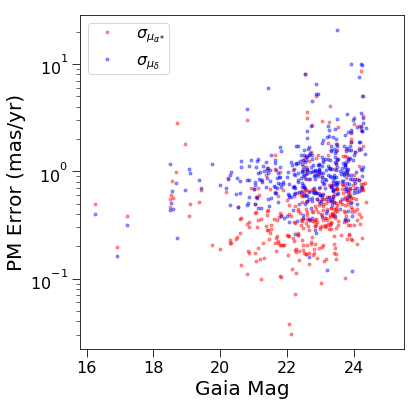

In [28]:
plots.plot_pm_error(tab)


[-10, 10, -10, 10]

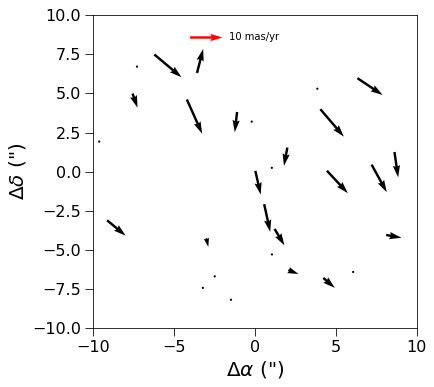

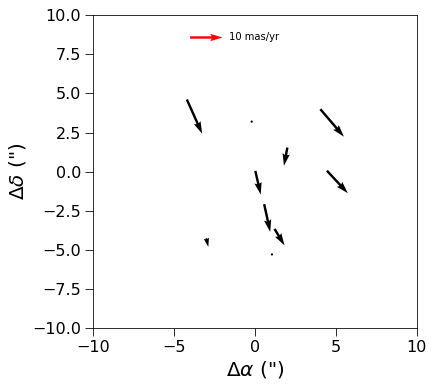

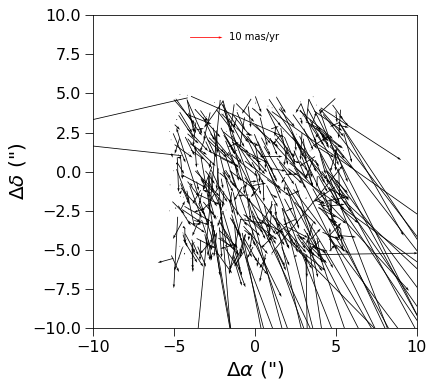

In [29]:
# Proper motions for the Gaia catalog:
plots.plot_pm(my_gaia)
plt.axis([-10, 10, -10, 10])

# Proper motions for the Gaia sources in the NIRC2 catalog:
plots.plot_pm(tab[0:10])
plt.axis([-10, 10, -10, 10])

# Proper motions for the entire NIRC2 catalog:
plots.plot_pm(tab)
plt.axis([-10, 10, -10, 10])

In [30]:
my_gaia['name','x0','y0','vx','vy'][0:10].pprint(max_width=1000)
tab['name','x0','y0','vx','vy'][0:10].pprint(max_width=1000)

        name                 x0                   y0                   vx                     vy          
------------------- -------------------- ------------------- ---------------------- ----------------------
           ob150029 0.039217438939947676 0.05179165957542864  0.0016123295507625996  -0.007335898165122768
4062575141137611008   1.0566811709841983 0.24554193880703679                    0.0                    0.0
4062575136877849344    0.585468014265451  -2.073177849668184  0.0018027427941448369  -0.008569262819927035
4062575136877849984   2.0158611670334037  1.5399939020255715 -0.0010209671338318573 -0.0056359138099316645
4062575141204361984   -0.185364253800593   3.198498641546621                    0.0                    0.0
4062575141204360192   1.2268301828887946 -3.6555550744523657   0.002984091249458642  -0.005112384710071517
         S11_15_3.9  -1.0880466151592305  3.8121017403994983 -0.0006848936156065187  -0.006239739142300629
         S13_13_4.5   4.4589828598191

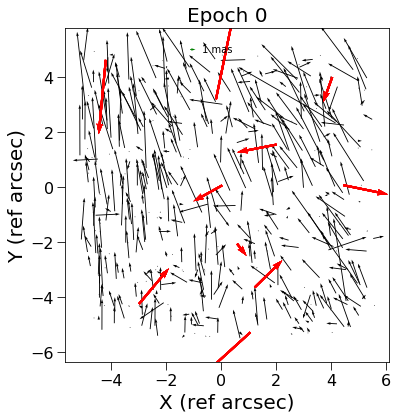

Residuals (mean, std): dx =   0.000 +/-   5.806 mas  dy =  -0.000 +/-   9.786 mas for REF stars
Residuals (mean, std): dx =  -1.088 +/-   2.034 mas  dy =   3.027 +/-   3.406 mas for GOOD stars


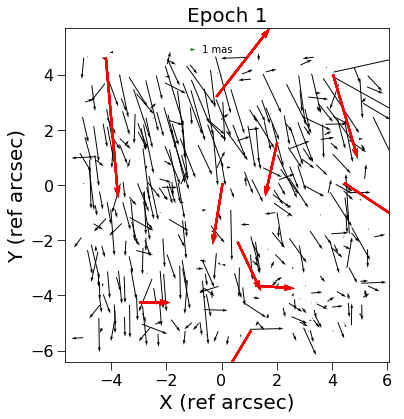

Residuals (mean, std): dx =   3.455 +/-   5.926 mas  dy =  -8.213 +/-   9.884 mas for REF stars
Residuals (mean, std): dx =   1.222 +/-   1.932 mas  dy =  -3.033 +/-   3.540 mas for GOOD stars


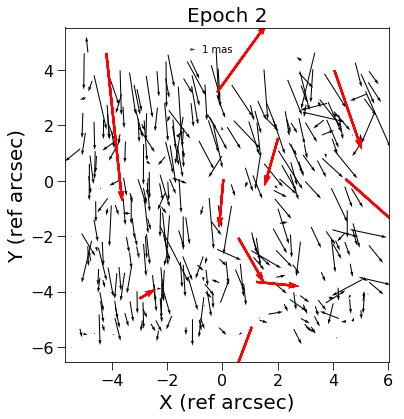

Residuals (mean, std): dx =   3.328 +/-   4.915 mas  dy =  -7.926 +/-  10.284 mas for REF stars
Residuals (mean, std): dx =   0.882 +/-   1.783 mas  dy =  -3.656 +/-   3.086 mas for GOOD stars


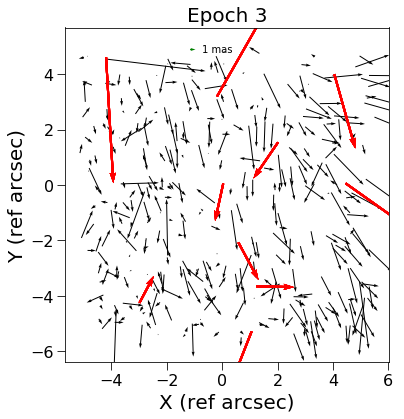

Residuals (mean, std): dx =   2.656 +/-   5.366 mas  dy =  -6.132 +/-  10.379 mas for REF stars
Residuals (mean, std): dx =   0.934 +/-   2.172 mas  dy =  -1.728 +/-   3.241 mas for GOOD stars


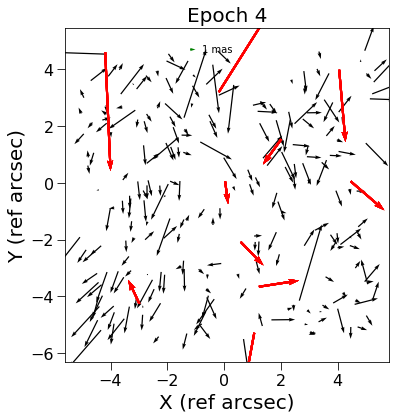

Residuals (mean, std): dx =   2.143 +/-   4.303 mas  dy =  -5.057 +/-  10.219 mas for REF stars
Residuals (mean, std): dx =   0.441 +/-   2.216 mas  dy =  -1.477 +/-   3.489 mas for GOOD stars


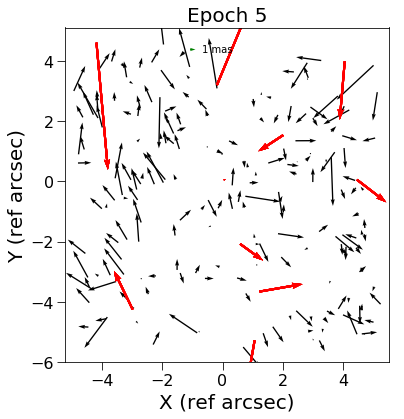

Residuals (mean, std): dx =   1.536 +/-   4.393 mas  dy =  -3.659 +/-  11.433 mas for REF stars
Residuals (mean, std): dx =  -0.152 +/-   2.100 mas  dy =   0.338 +/-   3.734 mas for GOOD stars


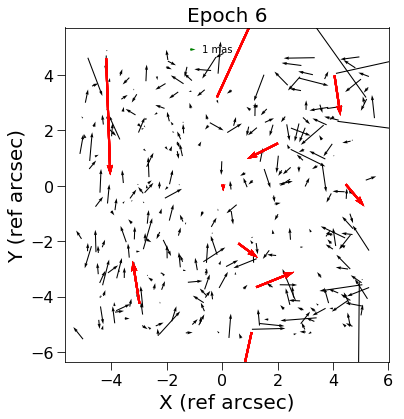

Residuals (mean, std): dx =   1.268 +/-   4.085 mas  dy =  -3.005 +/-  10.586 mas for REF stars
Residuals (mean, std): dx =  -0.176 +/-   2.191 mas  dy =   0.491 +/-   3.094 mas for GOOD stars


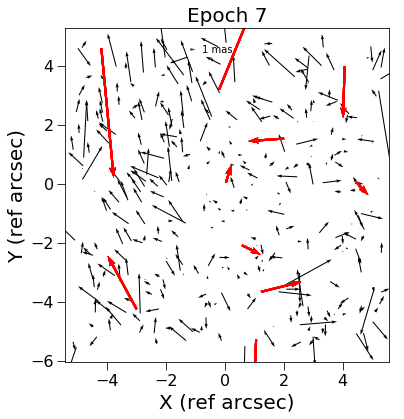

Residuals (mean, std): dx =   1.067 +/-   4.427 mas  dy =  -2.538 +/-  12.149 mas for REF stars
Residuals (mean, std): dx =  -0.433 +/-   1.838 mas  dy =   0.865 +/-   3.357 mas for GOOD stars


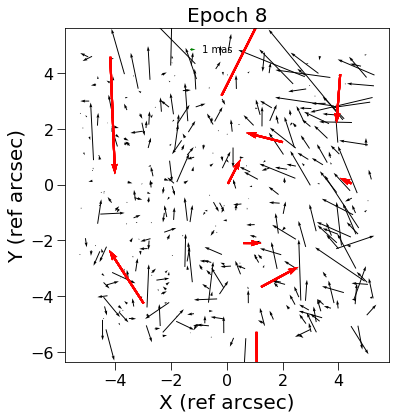

Residuals (mean, std): dx =   0.591 +/-   4.714 mas  dy =  -1.470 +/-  11.806 mas for REF stars
Residuals (mean, std): dx =  -0.703 +/-   2.265 mas  dy =   1.046 +/-   3.097 mas for GOOD stars


In [31]:
plots.plot_quiver_residuals_all_epochs(tab, unit='arcsec', scale=60)


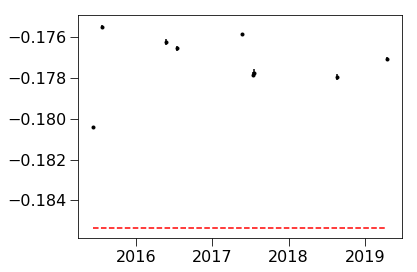

In [32]:
ii = 3

plt.errorbar(tab['t'][ii,:], tab['x'][ii,:], yerr=tab['xe'][ii,:], fmt='k.')
plt.plot(tab['t'][ii,:], tab['x0'][ii] + tab['vx'][ii]*(tab['t'][ii, :] - tab['t0'][ii]), 'r--')

## Re-match and transform.


In [33]:
msc2 = align.MosaicToRef(my_gaia, list_of_starlists, iters=3,
                         dr_tol=[0.2, 0.1, 0.05], dm_tol=[1, 1, 0.5],
                         outlier_tol=[5, 3, 3], mag_lim=[1,19],
                         trans_class=transforms.PolyTransform,
                         trans_input=msc.trans_list,
                         trans_args=[{'order': 2}, {'order': 2}, {'order': 3}], use_vel=True,
                         weights='list,std',
                         update_ref_orig=True, use_ref_new=True, mag_trans=True,
                         init_guess_mode='name', verbose=True)

msc2.fit()

tab2 = msc2.ref_table

 
**********
**********
Starting iter 0 with ref_table shape: (30, 1)
**********
**********
 
   **********
   Matching catalog 1 / 9 with 508 stars
      dr       < 0.200
      |dm|     < 1.000
      outlier tol:  5
          mag_lim:  [ 1 19]
   **********
    Found 0 duplicates out of 10 matches
  Match 1: Found  10  matches out of  136 . If match count is low, check dr_tol, dm_tol.
  Outlier Rejection: Keeping 9 of 10
  Rejected  1  outliers.
  Rejected  0  with use_in_trans=False.
  Using  9  stars in transformation.
    Found 0 duplicates out of 10 matches
  Match 2: After trans, found  10  matches out of  508 . If match count is low, check dr_tol, dm_tol.
Starting startable.fit_velocities for 528 stars with n=0 bootstrap
startable.fit_velocities runtime = 0 s for 528 stars
  Residuals: 
    dr (mean and std) for all stars :  0.00863 +/-  0.00985
    dm (mean and std) for all stars :  0.07102 +/-  0.36497
    dr (mean and std) for trans stars:  0.00568 +/-  0.00452
    dm (mean a

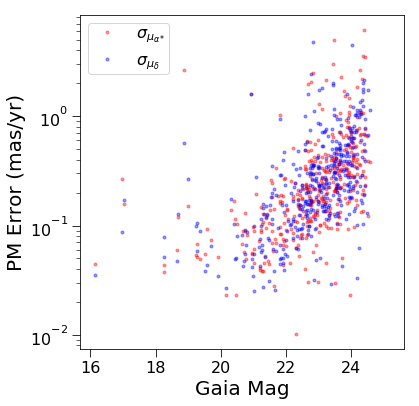

In [34]:
plots.plot_pm_error(tab2)

[-10, 10, -10, 10]

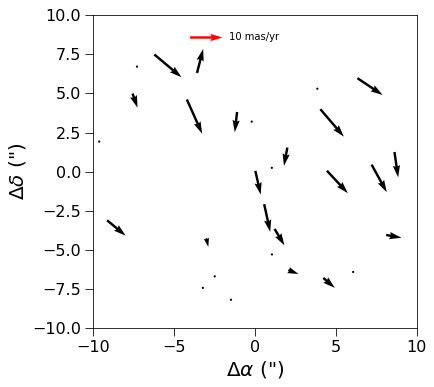

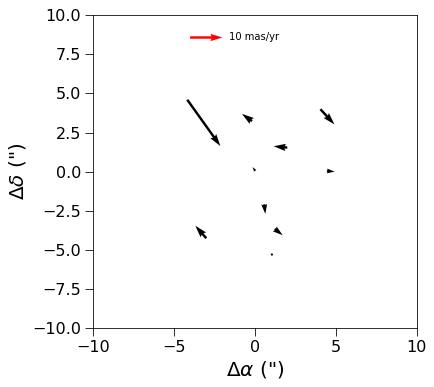

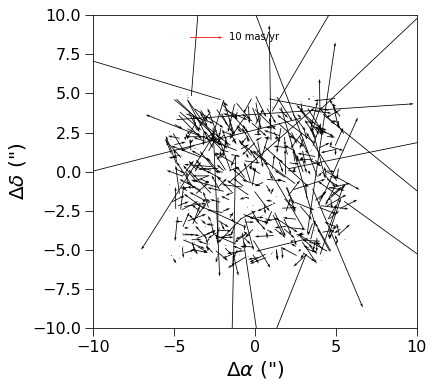

In [35]:
plots.plot_pm(my_gaia)
plt.axis([-10, 10, -10, 10])
plots.plot_pm(tab2[0:10])
plt.axis([-10, 10, -10, 10])
plots.plot_pm(tab2)
plt.axis([-10, 10, -10, 10])


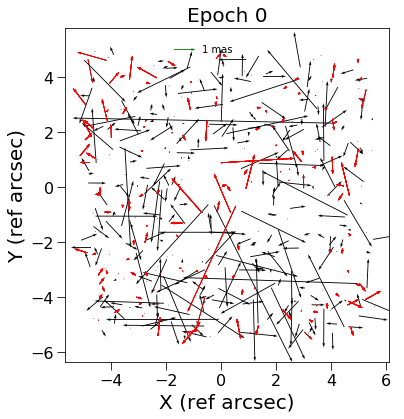

Residuals (mean, std): dx =  -0.003 +/-   0.397 mas  dy =   0.038 +/-   0.459 mas for REF stars
Residuals (mean, std): dx =  -0.011 +/-   1.091 mas  dy =  -0.055 +/-   0.879 mas for GOOD stars


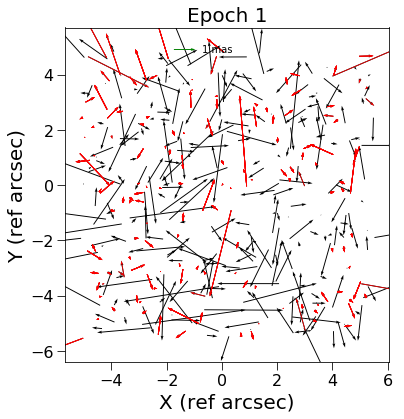

Residuals (mean, std): dx =  -0.023 +/-   0.404 mas  dy =   0.078 +/-   0.643 mas for REF stars
Residuals (mean, std): dx =  -0.033 +/-   0.942 mas  dy =   0.080 +/-   0.911 mas for GOOD stars


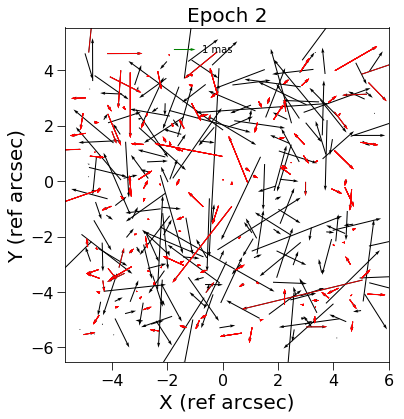

Residuals (mean, std): dx =  -0.060 +/-   0.592 mas  dy =  -0.032 +/-   0.597 mas for REF stars
Residuals (mean, std): dx =   0.025 +/-   1.236 mas  dy =  -0.037 +/-   1.348 mas for GOOD stars


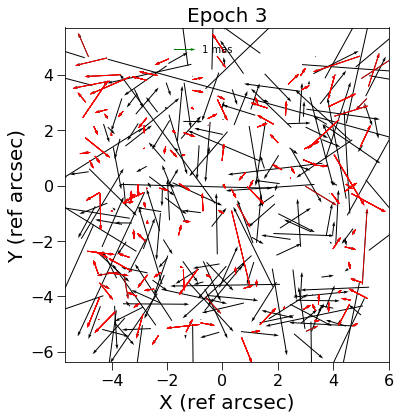

Residuals (mean, std): dx =   0.038 +/-   0.581 mas  dy =  -0.096 +/-   0.602 mas for REF stars
Residuals (mean, std): dx =  -0.012 +/-   1.635 mas  dy =  -0.142 +/-   1.880 mas for GOOD stars


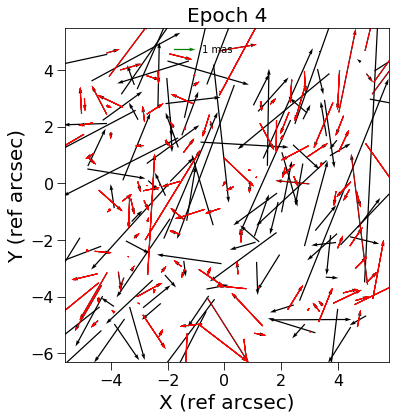

Residuals (mean, std): dx =   0.103 +/-   0.781 mas  dy =   0.004 +/-   1.243 mas for REF stars
Residuals (mean, std): dx =   0.040 +/-   1.622 mas  dy =   0.137 +/-   2.583 mas for GOOD stars


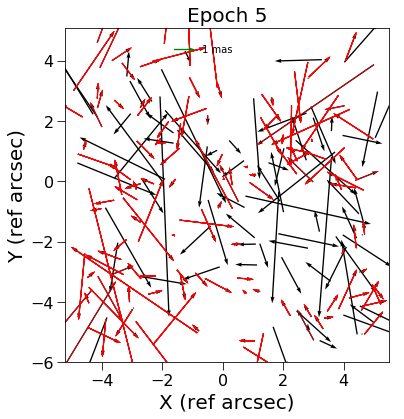

Residuals (mean, std): dx =  -0.052 +/-   1.158 mas  dy =  -0.016 +/-   1.855 mas for REF stars
Residuals (mean, std): dx =  -0.028 +/-   1.446 mas  dy =  -0.261 +/-   2.166 mas for GOOD stars


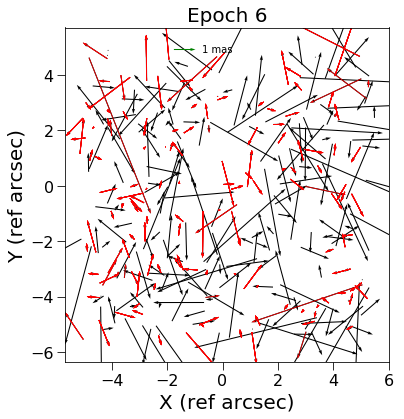

Residuals (mean, std): dx =  -0.008 +/-   0.562 mas  dy =   0.083 +/-   0.865 mas for REF stars
Residuals (mean, std): dx =   0.194 +/-   1.505 mas  dy =  -0.022 +/-   1.413 mas for GOOD stars


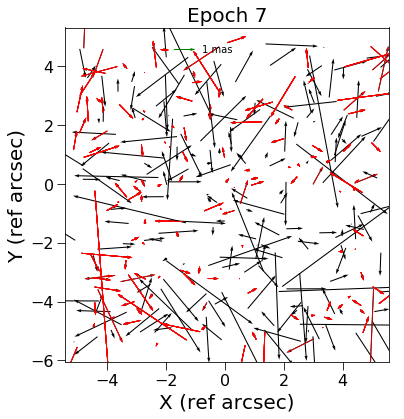

Residuals (mean, std): dx =   0.059 +/-   0.763 mas  dy =  -0.069 +/-   1.158 mas for REF stars
Residuals (mean, std): dx =   0.141 +/-   1.362 mas  dy =  -0.080 +/-   1.432 mas for GOOD stars


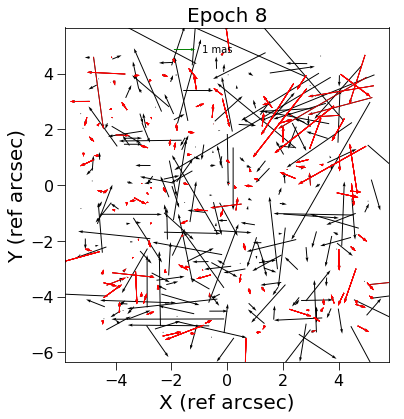

Residuals (mean, std): dx =  -0.094 +/-   0.648 mas  dy =  -0.146 +/-   0.750 mas for REF stars
Residuals (mean, std): dx =  -0.269 +/-   1.442 mas  dy =   0.015 +/-   1.402 mas for GOOD stars


In [36]:
plots.plot_quiver_residuals_all_epochs(tab2, scale=15)

# Analyze Output

Trimming 284 out of 604 stars in N_epochs < 6
S13_13_4.5           S13_13_4.5             4.4288   4.4559   0.0310   0.0501  13.4000  17.0438
ob150029             ob150029              -0.0000   0.0349  -0.0000   0.0518  12.7000  16.1255
Temporary shift transformations: 
    dm =   3.5346 +/-   0.1092
    dx =   0.0310 +/-   0.0039
    dy =   0.0355 +/-   0.0163
    Found 0 duplicates out of 95 matches
Renaming 95 out of 320 stars


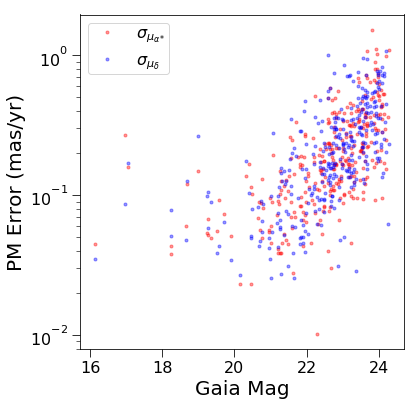

In [37]:
# Trim based on N_epochs
n_epochs_cut = 6
tdx = np.where(tab2['n_detect'] >= n_epochs_cut)[0]
print('Trimming {0:d} out of {1:d} stars in N_epochs < {2:d}'.format(len(tab2) - len(tdx), len(tab2), n_epochs_cut))
tab2_t = tab2[tdx]

# Rename
label_dat_file = 'ob150029_label.dat'
tab2_t_n = analysis.rename_after_flystar(tab2_t, label_dat_file, dr_tol=0.1, dm_tol=0.3)

plots.plot_pm_error(tab2_t_n)

Creating residuals plots for star(s):
['ob150029', 'S002_16_0.3', 'S003_16_0.9', 'S005_16_1.1', 'S011_17_1.0', 'S14_15_2.2']
0 ob150029
Star:         ob150029
	X Chi^2 =  6.22 ( 43.55 for  7 dof)
	Y Chi^2 =  2.97 ( 20.81 for  7 dof)
[2015. 2016. 2017. 2018. 2019. 2020.] [2015.0, 2020.0]
[-0.7063955454480683, 0.7063955454480683]
10 S002_16_0.3
Star:         S002_16_0.3
	X Chi^2 =  2.78 ( 19.47 for  7 dof)
	Y Chi^2 =  5.52 ( 38.65 for  7 dof)
[2015. 2016. 2017. 2018. 2019. 2020.] [2015.0, 2020.0]
[-1.2419356553009553, 1.2419356553009553]
11 S003_16_0.9
Star:         S003_16_0.9
	X Chi^2 =  6.12 ( 42.82 for  7 dof)
	Y Chi^2 =  3.57 ( 25.02 for  7 dof)
[2015. 2016. 2017. 2018. 2019. 2020.] [2015.0, 2020.0]
[-0.6116486069314936, 0.6116486069314936]
12 S005_16_1.1
Star:         S005_16_1.1
	X Chi^2 =  4.19 ( 29.36 for  7 dof)
	Y Chi^2 =  1.34 (  9.39 for  7 dof)
[2015. 2016. 2017. 2018. 2019. 2020.] [2015.0, 2020.0]
[-0.6268289984555978, 0.6268289984555978]
23 S011_17_1.0
Star:         S011_

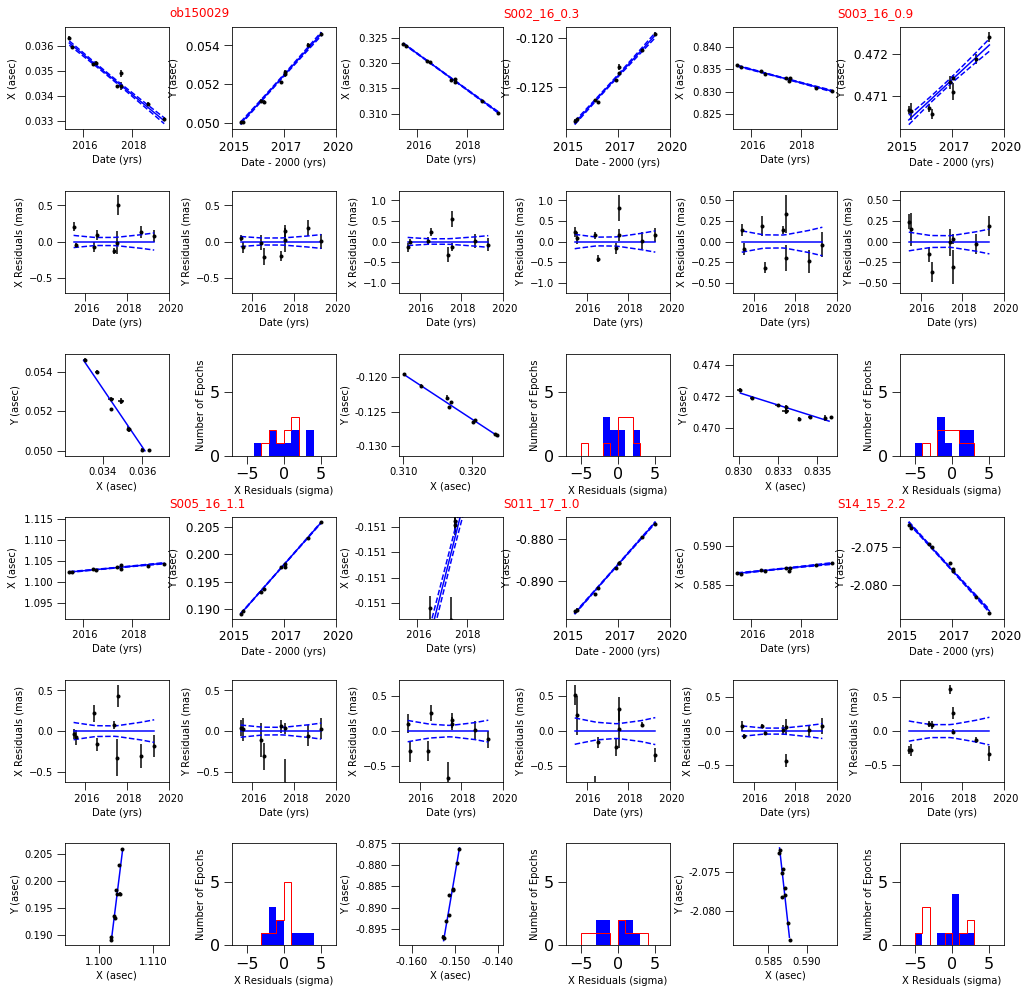

Fubar


In [39]:
plt.close('all')
plots.plot_stars(tab2_t_n, ['ob150029', 'S002_16_0.3', 'S003_16_0.9', 'S005_16_1.1', 'S011_17_1.0', 'S14_15_2.2'])

# Pass 3 of FlyStar

Narrow down to just "good stars" for the transf

pick_good_ref_stars: Starting with 320 stars.
pick_good_ref_stars: Use 113 stars after r<3.50.
pick_good_ref_stars: Use 60 stars after m<23.00.
pick_good_ref_stars: Use 56 stars after p_err<0.00030.
pick_good_ref_stars: Use 55 stars after pm_err<0.00025.
pick_good_ref_stars: Use 54 stars after name cut.


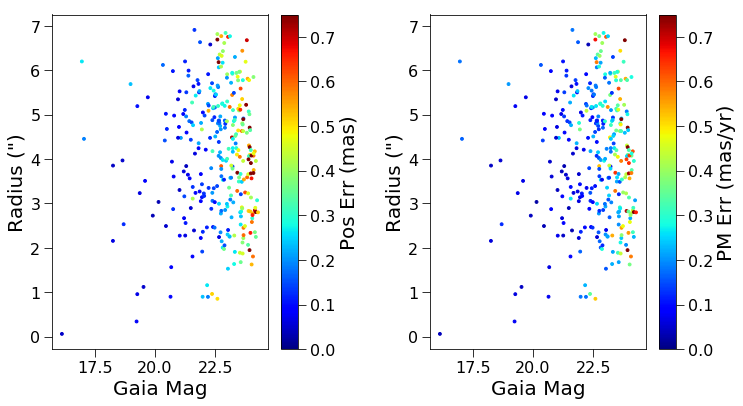

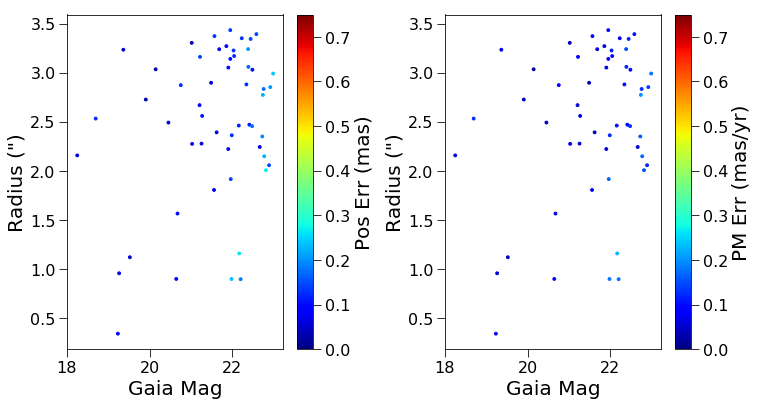

In [40]:
# Get a new reference list from the pass 2 alignment.
p3_ref_list = tab2_t_n['name', 't0',
                       'm0', 'm0e', 
                       'x0', 'x0e', 'vx', 'vxe', 
                       'y0', 'y0e', 'vy', 'vye', 
                       'use_in_trans']

# Repair use_in_trans column
p3_ref_list['use_in_trans'] = np.reshape(p3_ref_list['use_in_trans'].data, (len(p3_ref_list)))

# Check out the mean positional errors vs. magnitude and radius.
plots.plot_errors_vs_r_m(p3_ref_list)

# Designate only the "good-fitting" stars as reference stars. 
# First re-set so we don't have any reference stars. 
use = analysis.pick_good_ref_stars(p3_ref_list, r_cut=3.5, m_cut=23, 
                                        p_err_cut=0.0003, pm_err_cut=0.00025, 
                                        name_cut=['ob150029'], reset=True)


p3_ref_list['use_in_trans'] = False
p3_ref_list['use_in_trans'][use] = True

plots.plot_errors_vs_r_m(p3_ref_list[use])


# Inflate the error bars to a floor of 0.1 mas (additive error term)
# on the reference star list. 
new_list_of_starlists = []
for ii in range(len(list_of_starlists)):
    old_list = list_of_starlists[ii]
    new_list = copy.deepcopy(old_list)
    new_list['xe'] = np.hypot(old_list['xe'], 0.015)  # Adding 0.01 pix (0.1 mas) in quadrature.
    new_list['ye'] = np.hypot(old_list['ye'], 0.015)
    new_list_of_starlists.append(new_list)



In [41]:


msc3 = align.MosaicToRef(p3_ref_list, new_list_of_starlists, iters=4,
                         dr_tol=[0.2, 0.1, 0.05, 0.04], dm_tol=[1, 1, 0.5, 0.5],
                         outlier_tol=[5, 3, 3, 3], mag_lim=None,
                         trans_class=transforms.PolyTransform,
                         trans_input=msc.trans_list,
                         trans_args=[{'order': 1}, {'order': 2}, {'order': 2}, {'order': 2}], 
                         use_vel=True,
                         weights='list,std',
                         update_ref_orig=True, use_ref_new=False, mag_trans=True,
                         init_guess_mode='name', verbose=True)

msc3.fit()

tab3 = msc3.ref_table

 
**********
**********
Starting iter 0 with ref_table shape: (320, 1)
**********
**********
 
   **********
   Matching catalog 1 / 9 with 508 stars
      dr       < 0.200
      |dm|     < 1.000
      outlier tol:  5
          mag_lim:  [None None]
   **********
    Found 24 duplicates out of 335 matches
    confused, dropping
    confused, dropping
    confused, dropping
    confused, dropping
    confused, dropping
  Match 1: Found  305  matches out of  508 . If match count is low, check dr_tol, dm_tol.
  Outlier Rejection: Keeping 301 of 305
  Rejected  4  outliers.
  Rejected  247  with use_in_trans=False.
  Using  54  stars in transformation.
    Found 23 duplicates out of 339 matches
    confused, dropping
  Match 2: After trans, found  314  matches out of  508 . If match count is low, check dr_tol, dm_tol.
Starting startable.fit_velocities for 514 stars with n=0 bootstrap
startable.fit_velocities runtime = 0 s for 514 stars
  Residuals: 
    dr (mean and std) for all stars :  0

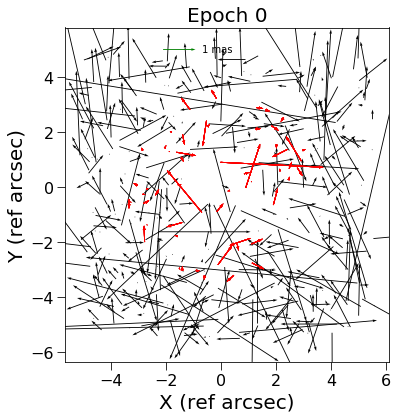

Residuals (mean, std): dx =   0.064 +/-   0.504 mas  dy =   0.056 +/-   0.348 mas for REF stars
Residuals (mean, std): dx =  -0.105 +/-   1.146 mas  dy =   0.192 +/-   1.015 mas for GOOD stars


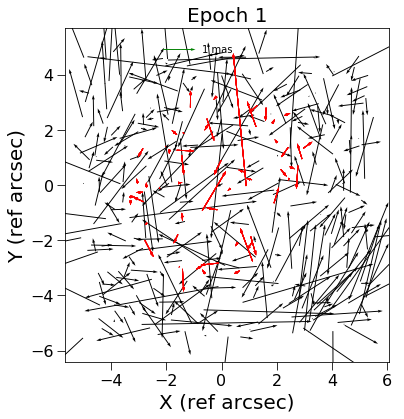

Residuals (mean, std): dx =  -0.017 +/-   0.220 mas  dy =   0.053 +/-   0.667 mas for REF stars
Residuals (mean, std): dx =   0.133 +/-   0.966 mas  dy =   0.242 +/-   1.031 mas for GOOD stars


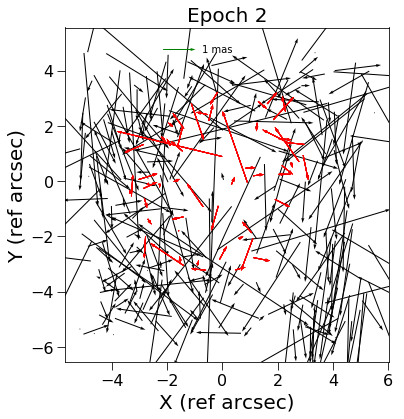

Residuals (mean, std): dx =  -0.108 +/-   0.568 mas  dy =   0.106 +/-   0.518 mas for REF stars
Residuals (mean, std): dx =   0.005 +/-   1.212 mas  dy =  -0.589 +/-   1.579 mas for GOOD stars


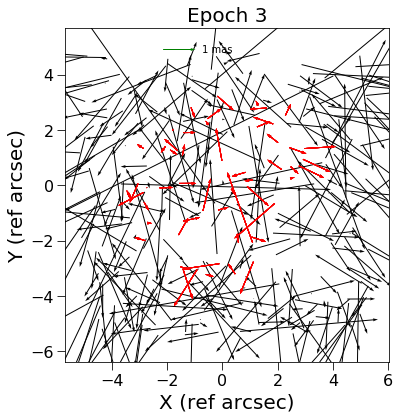

Residuals (mean, std): dx =   0.012 +/-   0.467 mas  dy =  -0.002 +/-   0.511 mas for REF stars
Residuals (mean, std): dx =   0.025 +/-   1.607 mas  dy =  -0.503 +/-   1.602 mas for GOOD stars


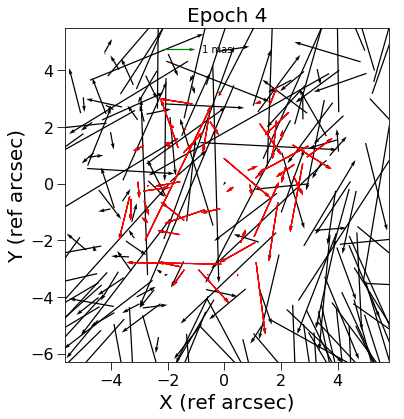

Residuals (mean, std): dx =  -0.079 +/-   0.746 mas  dy =  -0.175 +/-   0.937 mas for REF stars
Residuals (mean, std): dx =  -0.003 +/-   1.631 mas  dy =  -0.523 +/-   2.786 mas for GOOD stars


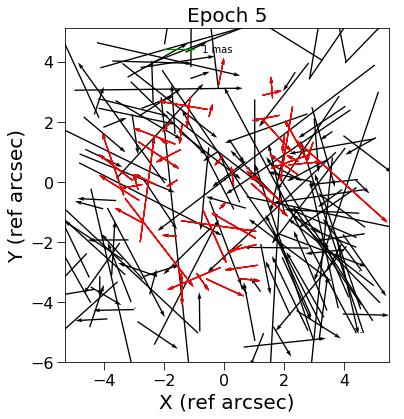

Residuals (mean, std): dx =  -0.108 +/-   0.924 mas  dy =  -0.102 +/-   0.966 mas for REF stars
Residuals (mean, std): dx =  -0.214 +/-   1.802 mas  dy =   0.064 +/-   2.445 mas for GOOD stars


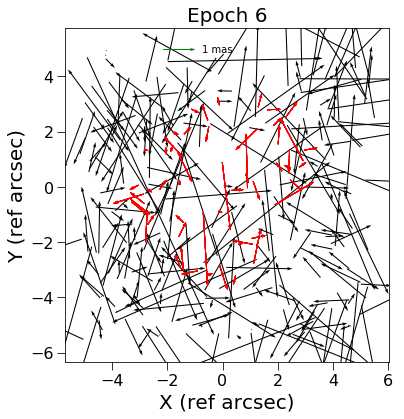

Residuals (mean, std): dx =   0.058 +/-   0.363 mas  dy =   0.025 +/-   0.661 mas for REF stars
Residuals (mean, std): dx =   0.212 +/-   1.474 mas  dy =   0.003 +/-   1.562 mas for GOOD stars


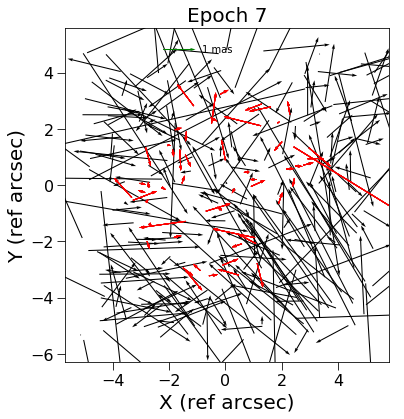

Residuals (mean, std): dx =   0.055 +/-   0.768 mas  dy =  -0.043 +/-   0.505 mas for REF stars
Residuals (mean, std): dx =   0.165 +/-   1.638 mas  dy =   0.313 +/-   1.689 mas for GOOD stars


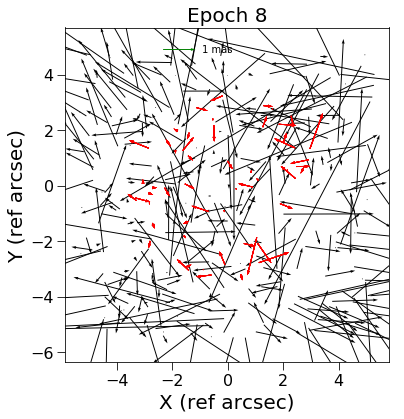

Residuals (mean, std): dx =   0.012 +/-   0.311 mas  dy =  -0.011 +/-   0.305 mas for REF stars
Residuals (mean, std): dx =  -0.138 +/-   1.710 mas  dy =   0.047 +/-   1.530 mas for GOOD stars


In [42]:
plots.plot_quiver_residuals_all_epochs(tab3, unit='arcsec', scale=10)

Trimming 297 out of 615 stars in N_epochs < 6


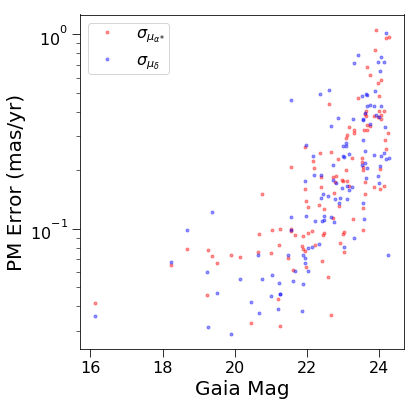

In [43]:
# Trim based on N_epochs
n_epochs_cut = 6
tdx = np.where(tab3['n_detect'] >= n_epochs_cut)[0]
print('Trimming {0:d} out of {1:d} stars in N_epochs < {2:d}'.format(len(tab3) - len(tdx), len(tab3), n_epochs_cut))
tab3_t = tab3[tdx]

rdx = np.where(np.hypot(tab3_t['x0'], tab3_t['y0']) < 3.5)[0]
plots.plot_pm_error(tab3_t[rdx])


Creating residuals plots for star(s):
['ob150029', 'S002_16_0.3', 'S003_16_0.9', 'S005_16_1.1', 'S011_17_1.0', 'S14_15_2.2']
0 ob150029
Star:         ob150029
	X Chi^2 =  0.85 (  5.97 for  7 dof)
	Y Chi^2 =  0.58 (  4.07 for  7 dof)
[2015. 2016. 2017. 2018. 2019. 2020.] [2015.0, 2020.0]
[-0.5473135889337478, 0.5473135889337478]
10 S002_16_0.3
Star:         S002_16_0.3
	X Chi^2 =  0.72 (  5.05 for  7 dof)
	Y Chi^2 =  1.02 (  7.15 for  7 dof)
[2015. 2016. 2017. 2018. 2019. 2020.] [2015.0, 2020.0]
[-1.0443276082131945, 1.0443276082131945]
11 S003_16_0.9
Star:         S003_16_0.9
	X Chi^2 =  2.28 ( 15.99 for  7 dof)
	Y Chi^2 =  0.35 (  2.46 for  7 dof)
[2015. 2016. 2017. 2018. 2019. 2020.] [2015.0, 2020.0]
[-0.5475484794955408, 0.5475484794955408]
12 S005_16_1.1
Star:         S005_16_1.1
	X Chi^2 =  1.70 ( 11.93 for  7 dof)
	Y Chi^2 =  0.77 (  5.36 for  7 dof)
[2015. 2016. 2017. 2018. 2019. 2020.] [2015.0, 2020.0]
[-0.5742242803386667, 0.5742242803386667]
23 S011_17_1.0
Star:         S011_

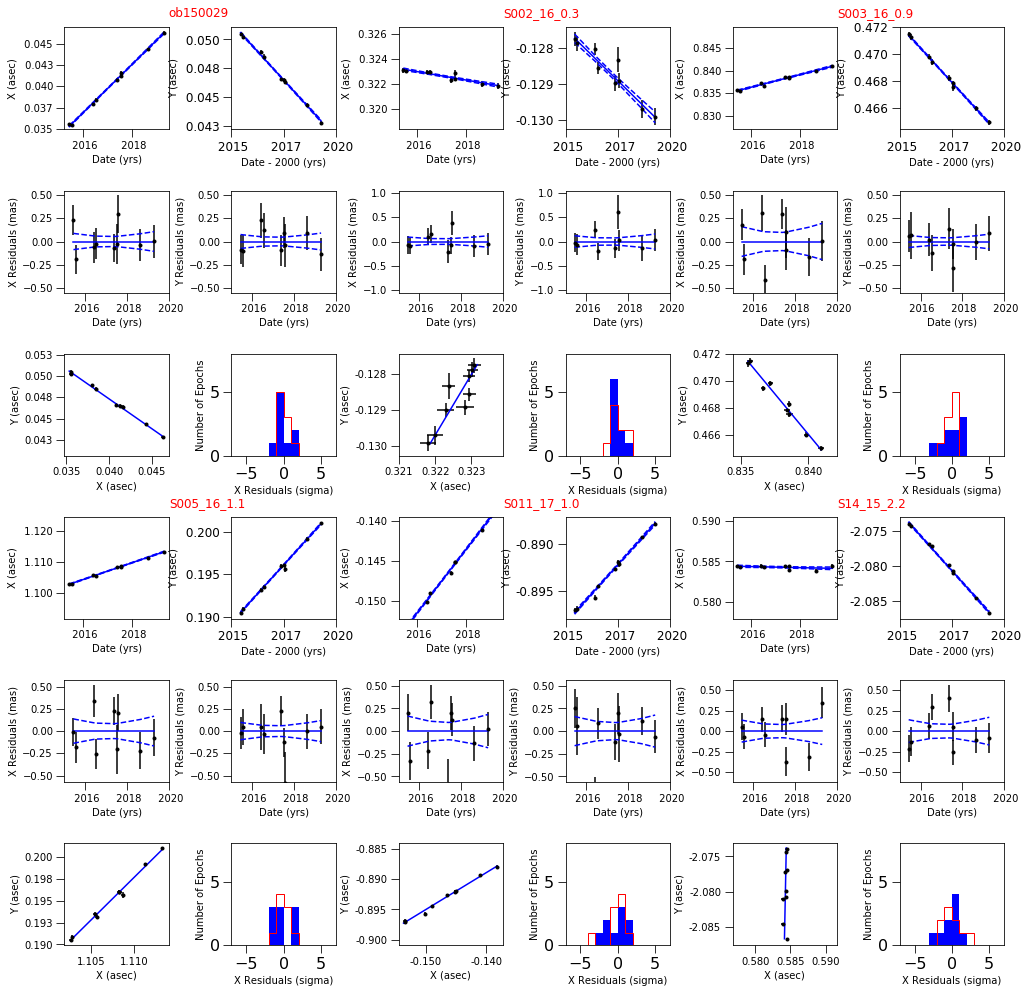

Fubar


In [44]:
plt.close('all')
plots.plot_stars(tab3_t, ['ob150029', 'S002_16_0.3', 'S003_16_0.9', 'S005_16_1.1', 'S011_17_1.0', 'S14_15_2.2'])